In [1]:
import pandas as pd



# Diapers

In [2]:
data_df= pd.read_csv('diapers.csv')
data_df

,Unnamed: 0,Listing,Actions,Avg Sold Price,Avg Shipping,Total Sold,Item_Sale,Bids,Date Last Sold
0,0,", preview full size imagePampers Swaddlers Act...",EditSell SimilarExclude listing,$34.05Fixed price,$0.00100% Free shipping,203,"$6,912.46",–,"Mar 19, 2024"
1,1,", preview full size imageDiapers Size 6 124 Co...",EditSell SimilarExclude listing,$34.47Fixed price,$0.00100% Free shipping,2,$68.94,–,"Mar 19, 2024"
2,2,", preview full size imageSize 5: 27lbs and up,...",EditSell SimilarExclude listing,$57.99Fixed price,$0.00100% Free shipping,21,"$1,217.79",–,"Mar 19, 2024"
3,3,", preview full size imageHuggies Size 4 Diaper...",EditSell SimilarExclude listing,$32.40Fixed price,$0.00100% Free shipping,2,$64.80,–,"Mar 19, 2024"
4,4,", preview full size imagePampers Swaddlers Dia...",EditSell SimilarExclude listing,$19.99Fixed price,$0.00100% Free shipping,1,$19.99,–,"Mar 19, 2024"
...,...,...,...,...,...,...,...,...,...
5695,45,", preview full size imageNIB Parent's Choice S...",EditExclude listing,$2.37Fixed price,$7.700% Free shipping,1,$2.37,–,"Jan 4, 2022"
5696,46,", preview full size imagePampers Baby Dry 37 c...",EditExclude listing,$15.00Fixed price,$0.00100% Free shipping,1,$15.00,–,"Jan 4, 2022"
5697,47,", preview full size imagePampers Baby Dry Disp...",EditExclude listing,$32.99Fixed price,$0.00100% Free shipping,1,$32.99,–,"Jan 4, 2022"
5698,48,", preview full size imagePampers Baby-Dry Extr...",EditExclude listing,$47.38Fixed price,$0.00100% Free shipping,17,$805.39,–,"Jan 3, 2022"


In [3]:


# Function to extract and format the first part of the string
def extract_and_format(value):
    parts = value.split('%')[0].split('$')[1]
    first_part = parts.strip()
    formatted_value = '{:.2f}'.format(float(first_part[1:]))
    return formatted_value


In [4]:
# Remove commas from all values in the DataFrame
data_df = data_df.replace(',', '', regex=True)
# 
data_df['Avg_Sold_Price'] = data_df['Avg Sold Price'].apply(lambda x: x.split('$')[1].split('F')[0].split('A')[0]).astype(float)

# 
data_df['Total_Sales'] = data_df['Item_Sale'].apply(lambda x: x.split('$')[1]).astype(float)

data_df['Total_Sold'] = data_df['Total Sold'].astype(float)

# Convert string to datetime
data_df['Date'] = pd.to_datetime(data_df['Date Last Sold'])

# Apply the function to the column
data_df['Shipping'] = data_df['Avg Shipping'].apply(lambda x: extract_and_format(x)).astype(float)

data_df.head()

,Unnamed: 0,Listing,Actions,Avg Sold Price,Avg Shipping,Total Sold,Item_Sale,Bids,Date Last Sold,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping
0,0,preview full size imagePampers Swaddlers Acti...,EditSell SimilarExclude listing,$34.05Fixed price,$0.00100% Free shipping,203,$6912.46,–,Mar 19 2024,34.05,6912.46,203.0,2024-03-19,0.0
1,1,preview full size imageDiapers Size 6 124 Cou...,EditSell SimilarExclude listing,$34.47Fixed price,$0.00100% Free shipping,2,$68.94,–,Mar 19 2024,34.47,68.94,2.0,2024-03-19,0.0
2,2,preview full size imageSize 5: 27lbs and up 1...,EditSell SimilarExclude listing,$57.99Fixed price,$0.00100% Free shipping,21,$1217.79,–,Mar 19 2024,57.99,1217.79,21.0,2024-03-19,0.0
3,3,preview full size imageHuggies Size 4 Diapers...,EditSell SimilarExclude listing,$32.40Fixed price,$0.00100% Free shipping,2,$64.80,–,Mar 19 2024,32.40,64.80,2.0,2024-03-19,0.0
4,4,preview full size imagePampers Swaddlers Diap...,EditSell SimilarExclude listing,$19.99Fixed price,$0.00100% Free shipping,1,$19.99,–,Mar 19 2024,19.99,19.99,1.0,2024-03-19,0.0


In [5]:
data_df.drop(columns=['Unnamed: 0', 'Actions', 'Avg Sold Price', 'Bids', 'Date Last Sold', 'Avg Shipping', 'Item_Sale', 'Total Sold'], inplace=True)
data_df.head()

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping
0,preview full size imagePampers Swaddlers Acti...,34.05,6912.46,203.0,2024-03-19,0.0
1,preview full size imageDiapers Size 6 124 Cou...,34.47,68.94,2.0,2024-03-19,0.0
2,preview full size imageSize 5: 27lbs and up 1...,57.99,1217.79,21.0,2024-03-19,0.0
3,preview full size imageHuggies Size 4 Diapers...,32.40,64.80,2.0,2024-03-19,0.0
4,preview full size imagePampers Swaddlers Diap...,19.99,19.99,1.0,2024-03-19,0.0


In [6]:
data_df['Listing'] = data_df['Listing'].apply(lambda x: x.split('image')[-1])

In [7]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

# Download NLTK resources (only need to do this once)
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract keywords
def extract_keywords(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    keywords = [word for word, pos in tagged_tokens if pos in ['NN', 'NNS', 'NNP', 'JJ']]
    return keywords


[nltk_data] Downloading package punkt to /Users/evanbruno/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evanbruno/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [8]:
# Apply the function to both listing titles and descriptions
data_df['Title_Keywords'] = data_df['Listing'].apply(extract_keywords)
data_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
0,Pampers Swaddlers Active Baby Diapers Enormous...,34.05,6912.46,203.0,2024-03-19,0.0,"[Pampers, Swaddlers, Active, Baby, Diapers, En..."
1,Diapers Size 6 124 CountDiapers Size 6 124 Count,34.47,68.94,2.0,2024-03-19,0.0,"[Diapers, Size, Count]"
2,Size 5: 27lbs and up 168 Count Kirkland Signat...,57.99,1217.79,21.0,2024-03-19,0.0,"[Size, Count, Kirkland, Signature, Diapers, Co..."
3,Huggies Size 4 Diapers Little Movers Baby Diap...,32.40,64.80,2.0,2024-03-19,0.0,"[Huggies, Diapers, Little, Movers, Baby, Diape..."
4,Pampers Swaddlers Diapers Size 1 96 CountPampe...,19.99,19.99,1.0,2024-03-19,0.0,"[Pampers, Swaddlers, Diapers, Size, Count]"
...,...,...,...,...,...,...,...
5695,NIB Parent's Choice Size One DiapersNIB Parent...,2.37,2.37,1.0,2022-01-04,0.7,"[NIB, Parent, Choice, Size, DiapersNIB, Parent..."
5696,Pampers Baby Dry 37 ct Diapers - White - Size...,15.00,15.00,1.0,2022-01-04,0.0,"[Pampers, Baby, Dry, ct, Diapers, White, Size,..."
5697,Pampers Baby Dry Disposable Diapers NEWBORN SI...,32.99,32.99,1.0,2022-01-04,0.0,"[Pampers, Baby, Dry, Disposable, Diapers, NEWB..."
5698,Pampers Baby-Dry Extra Protection Diapers - Ne...,47.38,805.39,17.0,2022-01-03,0.0,"[Pampers, Baby-Dry, Extra, Protection, Diapers..."


# Trends

In [9]:
data_df['Month_Year'] = data_df['Date'].dt.strftime('%B %Y')

avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month_Year').sum()['Total_Sales']

count = data_df.groupby(by='Month_Year').count()['Total_Sales']

unique = data_df.groupby(['Month_Year'])['Listing'].nunique()

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count, 'Unique_Listings': unique}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')

trend_df

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_3954/2613833271.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_3954/2613833271.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_3954/2613833271.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. 

,Avg_Sold,Total_Sold,Total_Sales,Count,Unique_Listings,Date
Month_Year,,,,,,
January 2022,35.471185,861.0,24128.11,135,133,2022-01-01
February 2022,39.905926,573.0,23204.90,108,102,2022-02-01
March 2022,35.460569,736.0,27549.95,123,121,2022-03-01
April 2022,33.366953,453.0,15117.74,128,123,2022-04-01
May 2022,37.724539,492.0,19346.87,141,137,2022-05-01
June 2022,36.301958,762.0,29569.97,143,137,2022-06-01
July 2022,37.291149,890.0,37117.27,148,142,2022-07-01
August 2022,36.206444,923.0,34824.50,135,130,2022-08-01
September 2022,33.795455,1013.0,31031.48,154,151,2022-09-01


In [111]:
data_df['Month_Year'] = data_df['Date'].dt.strftime('%B %Y')

avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month_Year').sum()['Total_Sales']

count = data_df.groupby(by='Month_Year').count()['Total_Sales']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales, 'Count': count}

trend_df = pd.DataFrame.from_dict(trend_dict)

trend_df['Date'] = pd.to_datetime(trend_df.index)
trend_df = trend_df.sort_values(by='Date')

trend_df

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2078/2835948711.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_sold = data_df.groupby(by='Month_Year').mean()['Avg_Sold_Price']
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2078/2835948711.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_sold = data_df.groupby(by='Month_Year').sum()['Total_Sold']
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2078/2835948711.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. 

,Avg_Sold,Total_Sold,Total_Sales,Count,Date
Month_Year,,,,,
January 2022,35.471185,861.0,24128.11,135,2022-01-01
February 2022,39.905926,573.0,23204.90,108,2022-02-01
March 2022,35.460569,736.0,27549.95,123,2022-03-01
April 2022,33.366953,453.0,15117.74,128,2022-04-01
May 2022,37.724539,492.0,19346.87,141,2022-05-01
June 2022,36.301958,762.0,29569.97,143,2022-06-01
July 2022,37.291149,890.0,37117.27,148,2022-07-01
August 2022,36.206444,923.0,34824.50,135,2022-08-01
September 2022,33.795455,1013.0,31031.48,154,2022-09-01


In [106]:
from matplotlib import pyplot as plt

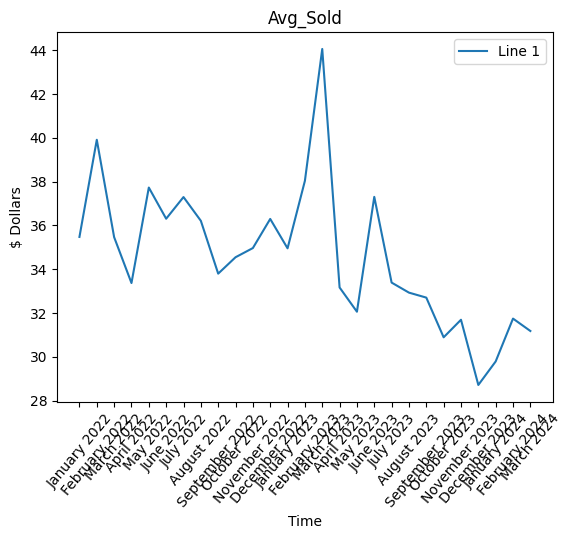

In [110]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Avg_Sold')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

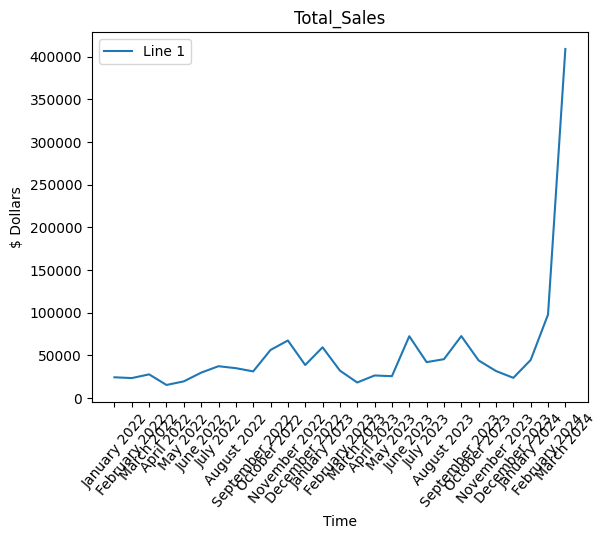

In [114]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Total_Sales'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Total_Sales')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

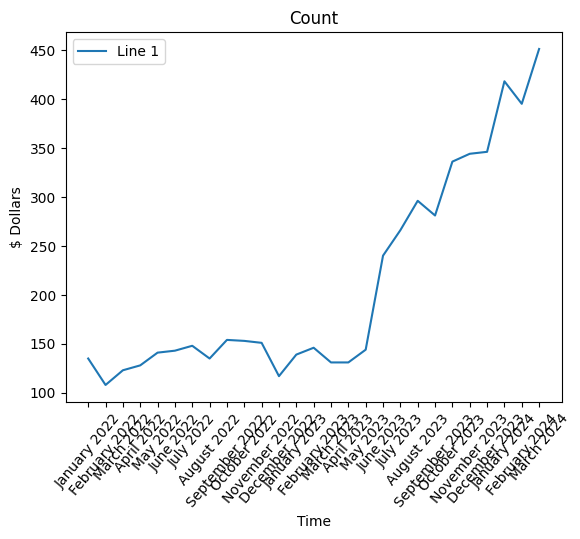

In [115]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Count'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Count')
plt.xticks(rotation=50) 

# Adding legend
plt.legend()

# Display the plot
plt.show()

In [61]:
data_df['Month'] = data_df['Date'].dt.month

avg_sold = data_df.groupby(by='Month').mean()['Avg_Sold_Price']

total_sold = data_df.groupby(by='Month').sum()['Total_Sold']

total_sales = data_df.groupby(by='Month').sum()['Total_Sales']

trend_dict = {'Avg_Sold': avg_sold, 'Total_Sold': total_sold, 'Total_Sales': total_sales}

trend_df = pd.DataFrame.from_dict(trend_dict)
trend_df

/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2078/546015248.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_sold = data_df.groupby(by='Month').mean()['Avg_Sold_Price']
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2078/546015248.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_sold = data_df.groupby(by='Month').sum()['Total_Sold']
/var/folders/g3/164q6cz52jv0sjllnsg7jdsm0000gn/T/ipykernel_2078/546015248.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specif

,Avg_Sold,Total_Sold,Total_Sales
Month,,,
1,31.933150,3610.0,127851.23
2,34.516487,5374.0,152809.26
3,34.316738,14137.0,454790.30
4,33.264324,1141.0,41361.63
5,34.860982,1092.0,44775.36
6,36.927493,2788.0,101853.07
7,34.782488,2177.0,79016.18
8,33.955104,2093.0,80175.44
9,33.088437,3635.0,103472.84


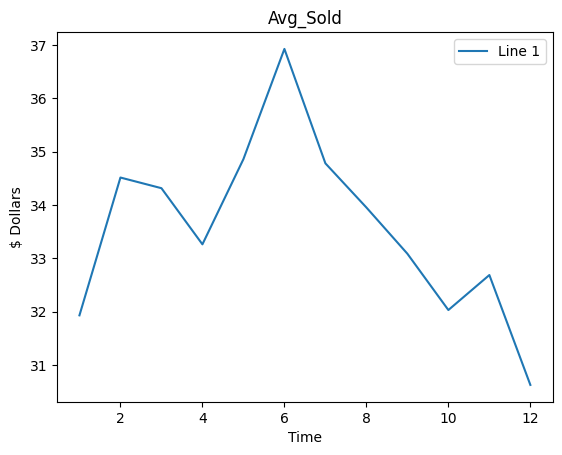

In [62]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Avg_Sold'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Avg_Sold')

# Adding legend
plt.legend()

# Display the plot
plt.show()

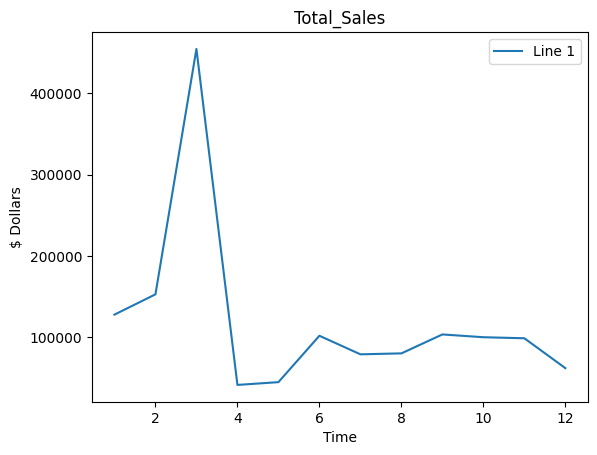

In [63]:


# Plotting the lines
plt.plot(trend_df.index, trend_df['Total_Sales'], label='Line 1')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('$ Dollars')
plt.title('Total_Sales')

# Adding legend
plt.legend()

# Display the plot
plt.show()

# Popular Whole DF

In [12]:
filtered_df= data_df.loc[data_df['Avg_Sold_Price'] > 10]
filtered_df.head()

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
0,Pampers Swaddlers Active Baby Diapers Enormous...,34.05,6912.46,203.0,2024-03-19,0.0,"[Pampers, Swaddlers, Active, Baby, Diapers, En..."
1,Diapers Size 6 124 CountDiapers Size 6 124 Count,34.47,68.94,2.0,2024-03-19,0.0,"[Diapers, Size, Count]"
2,Size 5: 27lbs and up 168 Count Kirkland Signat...,57.99,1217.79,21.0,2024-03-19,0.0,"[Size, Count, Kirkland, Signature, Diapers, Co..."
3,Huggies Size 4 Diapers Little Movers Baby Diap...,32.40,64.80,2.0,2024-03-19,0.0,"[Huggies, Diapers, Little, Movers, Baby, Diape..."
4,Pampers Swaddlers Diapers Size 1 96 CountPampe...,19.99,19.99,1.0,2024-03-19,0.0,"[Pampers, Swaddlers, Diapers, Size, Count]"


In [13]:
from collections import Counter
# Flatten the filtered lists
data_df_lists = filtered_df['Title_Keywords'].sum()

# Count the occurrences of each word
word_counts = Counter(data_df_lists)

# Find the most common words
most_common_words = word_counts.most_common()

In [66]:

def extract_phrases(title):
    tokens = title.split()  # Tokenize the title
    phrases = []
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + 6, len(tokens) + 1)):  # Generate combinations of 2 to 5 words
            phrase = ' '.join(tokens[i:j])
            if len(phrase.split()) >= 2 and len(phrase.split()) <= 5:  # Check if phrase length is between 2 and 5
                phrases.append(phrase)
    return phrases

# Apply the function to the Titles column
phrases = filtered_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

,Name,Count
0,Diapers Size,5159
1,Baby Diapers,2611
2,Baby Diapers Size,1672
3,Size 4,1220
4,Disposable Diapers,1218
5,Size 3,1157
6,Size 5,1096
7,Size 1,1077
8,Size 6,1049
9,- Size,986


In [67]:
type_product = most_common_phrases_df['Name'].head(20).tolist()
type_product

['Diapers Size',
 'Baby Diapers',
 'Baby Diapers Size',
 'Size 4',
 'Disposable Diapers',
 'Size 3',
 'Size 5',
 'Size 1',
 'Size 6',
 '- Size',
 'Size 2',
 'Baby Dry',
 'Pampers Swaddlers',
 'Little Snugglers',
 'Diapers Size 4',
 'Diapers Size 3',
 'Huggies Little',
 'Little Movers',
 'Diapers -',
 'Swaddlers Diapers']

In [68]:
dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}



In [69]:
for phrase in type_product:
    # Filter rows where 'vitamin' or 'Vitamin' is in the list
    temp_df = data_df[data_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    count = temp_df.describe()['Total_Sold'].tolist()[0]

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(count)
    dict_sales['Ship_Cost'].append(ship)
    
pd.DataFrame.from_dict(dict_sales)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
0,Diapers Size,33.814650,19.9900,44.0000,2873.0,0.0
1,Baby Diapers,33.951553,19.3900,45.0000,1507.0,0.0
2,Baby Diapers Size,34.214918,19.0000,45.0000,917.0,0.0
3,Size 4,35.182114,22.4450,44.9550,700.0,0.0
4,Disposable Diapers,34.206483,21.7250,42.1300,691.0,0.0
5,Size 3,31.611944,19.2675,40.0000,684.0,0.0
6,Size 5,34.953130,20.9900,42.1250,591.0,0.0
7,Size 1,32.090106,18.9975,40.9925,660.0,0.0
8,Size 6,35.719879,20.7000,44.9900,577.0,0.0
9,- Size,30.903790,20.9900,37.6300,533.0,0.0


# Brands Analysis

In [73]:
# Filter the DataFrame
testing_df = filtered_df[filtered_df['Listing'].str.contains('Pampers Swaddlers')]
testing_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
0,Pampers Swaddlers Active Baby Diapers Enormous...,34.05,6912.46,203.0,2024-03-19,0.0,"[Pampers, Swaddlers, Active, Baby, Diapers, En..."
4,Pampers Swaddlers Diapers Size 1 96 CountPampe...,19.99,19.99,1.0,2024-03-19,0.0,"[Pampers, Swaddlers, Diapers, Size, Count]"
8,Pampers Swaddlers Active Baby Diapers - Size 1...,28.00,28.00,1.0,2024-03-19,0.0,"[Pampers, Swaddlers, Active, Baby, Diapers, Si..."
10,Pampers Swaddlers Diapers - Size 2 84 Count Ul...,36.67,36.67,1.0,2024-03-19,0.0,"[Pampers, Swaddlers, Diapers, Size, Count, Ult..."
11,Pampers Swaddlers Diapers Size 2 84 CountPampe...,24.84,24.84,1.0,2024-03-19,0.0,"[Pampers, Swaddlers, Diapers, Size, Count]"
...,...,...,...,...,...,...,...
5656,Pampers Swaddlers Diapers Size 2 -186 ct. (12-...,29.13,611.79,21.0,2022-01-13,0.0,"[Pampers, Swaddlers, Diapers, Size, -186, ct.,..."
5657,Pampers Swaddlers Disposable Baby Diapers Size...,68.32,204.97,3.0,2022-01-13,0.0,"[Pampers, Swaddlers, Disposable, Baby, Diapers..."
5668,Pampers Swaddlers Size 1 (8-14 lbs) Baby Diape...,23.99,23.99,1.0,2022-01-09,0.0,"[Pampers, Swaddlers, lbs, Baby, Diapers, Count..."
5676,Damaged Pampers Swaddlers Active Baby Diapers ...,30.00,120.00,4.0,2022-01-08,0.0,"[Pampers, Swaddlers, Active, Baby, Diapers, Si..."


In [74]:
# Apply the function to the Titles column
phrases = testing_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

In [75]:
most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

,Name,Count
0,Pampers Swaddlers,808
1,Diapers Size,682
2,Swaddlers Diapers,646
3,Swaddlers Diapers Size,372
4,Pampers Swaddlers Diapers,346
5,Swaddlers Disposable,325
6,Baby Diapers,232
7,Disposable Diapers,222
8,Pampers Swaddlers Disposable,221
9,- Size,208


In [80]:
# Filter the column containing the word "size"
size_df = most_common_phrases_df[most_common_phrases_df['Name'].str.contains('size')]

type_product = size_df.head(20)['Name'].tolist()

In [81]:
dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}



In [83]:
for phrase in type_product:
    # Filter rows where 'vitamin' or 'Vitamin' is in the list
    temp_df = testing_df[testing_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    count = temp_df.describe()['Total_Sold'].tolist()[0]

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(count)
    dict_sales['Ship_Cost'].append(ship)
    
pd.DataFrame.from_dict(dict_sales)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
0,Swaddlers Diapers size,50.419444,40.2000,62.1975,18.0,0.0
1,Diapers size,45.505000,31.2300,59.9900,62.0,0.0
2,Pampers Swaddlers Diapers size,50.419444,40.2000,62.1975,18.0,0.0
3,lb.)Pampers Swaddlers Diapers size,60.015455,57.7550,62.4650,11.0,0.0
4,size 4,50.300435,43.4700,60.6700,23.0,0.0
5,Swaddlers Diapers size 5,56.476667,52.1350,62.7200,3.0,0.0
6,Diapers size 5,43.178750,33.7100,60.8500,8.0,0.0
7,size 5,39.524815,16.0000,54.8700,27.0,0.0
8,Swaddlers Diapers size 2,55.880000,52.9350,58.8250,2.0,0.0
9,Diapers size 2,41.437500,30.9975,52.9350,4.0,0.0


### Little Snugglers

In [84]:
# Filter the DataFrame
testing_df = filtered_df[filtered_df['Listing'].str.contains('Little Snugglers')]
testing_df

,Listing,Avg_Sold_Price,Total_Sales,Total_Sold,Date,Shipping,Title_Keywords
13,Huggies Little Snugglers Diapers Huge Pack - S...,34.70,12769.61,368.0,2024-03-19,0.00,"[Huggies, Little, Diapers, Huge, Pack, Size, L..."
17,Little Snugglers Baby Diapers Size Preemie 2 P...,21.40,64.20,3.0,2024-03-19,0.00,"[Little, Snugglers, Baby, Diapers, Size, Preem..."
19,Huggies Little Snugglers Diapers Giant Pack - ...,34.71,8538.63,246.0,2024-03-19,0.00,"[Huggies, Little, Diapers, Giant, Pack, Size, ..."
32,Huggies Little Snugglers Diapers - Size 4 - 14...,37.13,1448.14,39.0,2024-03-19,0.00,"[Huggies, Little, Diapers, Size, Little]"
34,Huggies Little Snugglers Diapers Huge Pack - S...,34.76,6917.98,199.0,2024-03-19,0.00,"[Huggies, Little, Diapers, Huge, Pack, Size, L..."
...,...,...,...,...,...,...,...
5632,Huggies Little Snugglers Baby Diaper for Newbo...,40.99,491.88,12.0,2022-01-17,0.00,"[Huggies, Little, Snugglers, Baby, Diaper, New..."
5634,Huggies Little Movers & Little Snugglers Diape...,59.95,1378.77,23.0,2022-01-16,0.00,"[Huggies, Little, Movers, Little, Diapers, Siz..."
5652,Huggies Baby Diapers Little Snugglers Up to 6l...,19.10,19.10,1.0,2022-01-13,0.00,"[Huggies, Baby, Diapers, Little, Snugglers, Up..."
5670,Huggies Little Snugglers Diapers Size 1 96 Cou...,20.00,20.00,1.0,2022-01-08,1.65,"[Huggies, Little, Diapers, Size, Little, Diape..."


In [85]:
# Apply the function to the Titles column
phrases = testing_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

In [86]:
most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])
most_common_phrases_df.head(25)

,Name,Count
0,Little Snugglers,784
1,Diapers Size,480
2,Baby Diapers,462
3,Snugglers Baby,426
4,Little Snugglers Baby,424
5,Huggies Little,384
6,Snugglers Baby Diapers,384
7,Little Snugglers Baby Diapers,382
8,Baby Diapers Size,379
9,Huggies Little Snugglers,360


In [93]:
# Filter the column containing the word "size"
size_df = most_common_phrases_df[most_common_phrases_df['Name'].str.contains('Size')]

type_product = size_df.head(20)['Name'].tolist()

In [95]:
dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}



In [96]:
for phrase in type_product:
    # Filter rows where 'vitamin' or 'Vitamin' is in the list
    temp_df = testing_df[testing_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    count = temp_df.describe()['Total_Sold'].tolist()[0]

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(count)
    dict_sales['Ship_Cost'].append(ship)
    
pd.DataFrame.from_dict(dict_sales)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
0,Diapers Size,35.926360,21.2000,48.9900,239.0,0.0
1,Baby Diapers Size,35.222864,19.9700,47.9850,199.0,0.0
2,Snugglers Baby Diapers Size,34.282047,18.6000,45.0000,171.0,0.0
3,Little Snugglers Baby Diapers Size,34.282047,18.6000,45.0000,171.0,0.0
4,Size 1,31.618367,20.4950,39.9850,98.0,0.0
5,Size Newborn,28.591507,15.0000,37.5400,73.0,0.0
6,Size 2,42.032143,32.2475,51.7150,70.0,0.0
7,Diapers Size 1,32.263182,22.0325,39.9975,66.0,0.0
8,Diapers Size Newborn,27.840000,12.7425,38.2050,56.0,0.0
9,Baby Diapers Size Newborn,27.840000,12.7425,38.2050,56.0,0.0


# Automation By Price

In [169]:
filtered_df= data_df.loc[data_df['Avg_Sold_Price'] > 20]


def extract_phrases(title):
    tokens = title.split()  # Tokenize the title
    phrases = []
    for i in range(len(tokens)):
        for j in range(i + 1, min(i + 6, len(tokens) + 1)):  # Generate combinations of 2 to 5 words
            phrase = ' '.join(tokens[i:j])
            if len(phrase.split()) >= 2 and len(phrase.split()) <= 5:  # Check if phrase length is between 2 and 5
                phrases.append(phrase)
    return phrases

# Apply the function to the Titles column
phrases = filtered_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()

most_common_phrases_df = pd.DataFrame(most_common_phrases, columns=['Name', 'Count'])

# Filter the DataFrame
testing_df = filtered_df[filtered_df['Listing'].str.contains('Baby Toys')]

# Apply the function to the Titles column
phrases = testing_df['Listing'].apply(extract_phrases).sum()

# Count the occurrences of each phrase
phrase_counts = Counter(phrases)

# Find the most common phrases
most_common_phrases = phrase_counts.most_common()


most_common_phrases_df = most_common_phrases_df[most_common_phrases_df['Name'].apply(lambda x: len(x.split()) > 3)]

type_product = most_common_phrases_df['Name'].head(15).tolist()

dict_sales = {'Phrase': [], 'Avg_Sold_Price_mean': [], 'Avg_Sold_Price_25': [], 'Avg_Sold_Price_75': [], 'Total_Sold': [], 'Ship_Cost': []}

for phrase in type_product:
    # Filter rows where 'vitamin' or 'Vitamin' is in the list
    temp_df = data_df[data_df['Listing'].apply(lambda x: phrase in x)]

    mean = temp_df.describe()['Avg_Sold_Price'].tolist()[1]

    percent_25 = temp_df.describe()['Avg_Sold_Price'].tolist()[4]

    percent_75 = temp_df.describe()['Avg_Sold_Price'].tolist()[6]

    count = temp_df.describe()['Total_Sold'].tolist()[0]

    ship = temp_df.describe()['Shipping'].tolist()[5]
    
    dict_sales['Phrase'].append(phrase)
    dict_sales['Avg_Sold_Price_mean'].append(mean)
    dict_sales['Avg_Sold_Price_25'].append(percent_25)
    dict_sales['Avg_Sold_Price_75'].append(percent_75)
    dict_sales['Total_Sold'].append(count)
    dict_sales['Ship_Cost'].append(ship)
    
pd.DataFrame.from_dict(dict_sales)

,Phrase,Avg_Sold_Price_mean,Avg_Sold_Price_25,Avg_Sold_Price_75,Total_Sold,Ship_Cost
0,for 1 Year Old,26.276527,15.5750,33.6350,239.0,0.0
1,Toys for 1 Year,25.474537,15.2650,32.8050,227.0,0.0
2,Toys for 1 Year Old,25.781357,15.2900,32.9300,221.0,0.0
3,6 to 12 Months,21.518037,13.5900,26.7150,219.0,0.0
4,Toys 6 to 12,22.755842,13.9900,29.4250,190.0,0.0
5,Learn Coffee Mug Baby,29.417234,25.0000,34.9900,94.0,0.0
6,Toys 6 to 12 Months,21.823684,13.4500,28.0650,171.0,0.0
7,Wake Up & Learn,27.885000,24.5000,33.2825,96.0,0.0
8,Baby Toys 6 to,23.051067,14.0525,29.8275,178.0,0.0
9,Baby Toys 6 to 12,23.104375,13.9900,29.9075,176.0,0.0
